# **German Dataset Preprocessing**

In [1]:
from src import utilities
from src import preprocessing
from src import plotting

ger_ds_path = '../../datasets/UCI/German/german.data'
ger_prep_ds_path = '../../datasets/preprocessed/ger/'

(CVXPY) May 30 05:02:50 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 30 05:02:50 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
utilities.create_directory(ger_prep_ds_path)

In [3]:
data = utilities.read_csv(ger_ds_path, sep=' ', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
 2   2       1000 non-null   object
 3   3       1000 non-null   object
 4   4       1000 non-null   int64 
 5   5       1000 non-null   object
 6   6       1000 non-null   object
 7   7       1000 non-null   int64 
 8   8       1000 non-null   object
 9   9       1000 non-null   object
 10  10      1000 non-null   int64 
 11  11      1000 non-null   object
 12  12      1000 non-null   int64 
 13  13      1000 non-null   object
 14  14      1000 non-null   object
 15  15      1000 non-null   int64 
 16  16      1000 non-null   object
 17  17      1000 non-null   int64 
 18  18      1000 non-null   object
 19  19      1000 non-null   object
 20  20      1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


#### Fix column names formatting.

In [5]:
data.columns = ['A{}'.format(i) for i in range(1, 22)]

In [6]:
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      1000 non-null   object
 1   A2      1000 non-null   int64 
 2   A3      1000 non-null   object
 3   A4      1000 non-null   object
 4   A5      1000 non-null   int64 
 5   A6      1000 non-null   object
 6   A7      1000 non-null   object
 7   A8      1000 non-null   int64 
 8   A9      1000 non-null   object
 9   A10     1000 non-null   object
 10  A11     1000 non-null   int64 
 11  A12     1000 non-null   object
 12  A13     1000 non-null   int64 
 13  A14     1000 non-null   object
 14  A15     1000 non-null   object
 15  A16     1000 non-null   int64 
 16  A17     1000 non-null   object
 17  A18     1000 non-null   int64 
 18  A19     1000 non-null   object
 19  A20     1000 non-null   object
 20  A21     1000 non-null   int64 
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


#### Fix column dtypes.

In [8]:
data = utilities.object_to_category(data)
data['defaulted'] = data['A21'] == 2

#### Drop original label column.

In [9]:
data.drop(['A21'], axis=1, inplace=True)

#### Plot features data types.

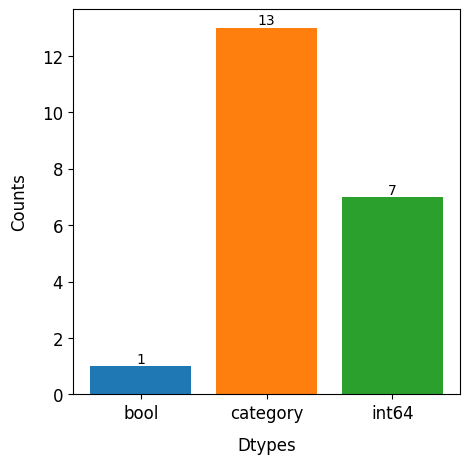

In [10]:
plotting.plot_dtypes_hist(data, save_path=ger_prep_ds_path)

#### Data cleaning.

In [11]:
before_data_cleaning_count = len(data)

#### Rename features labels to have more meaningful names.

In [12]:
data.rename(columns={'A1':'exist-check-acc-status',
                     'A2':'duration',
                     'A3':'credit-history',
                     'A4':'purpose',
                     'A5':'credit-amount',
                     'A6':'sav-acc',
                     'A7':'employment-years',
                     'A8':'install-rate',
                     'A9':'marriage-sex',
                     'A10':'guarantor',
                     'A11':'residency-dur',
                     'A12':'property',
                     'A13':'age',
                     'A14':'other-install-plans',
                     'A15':'housing',
                     'A16':'existing-credits',
                     'A17':'job',
                     'A18':'dependents',
                     'A19':'phone-provided',
                     'A20':'foreign-worker'}, inplace=True)

#### Plot class distribution.

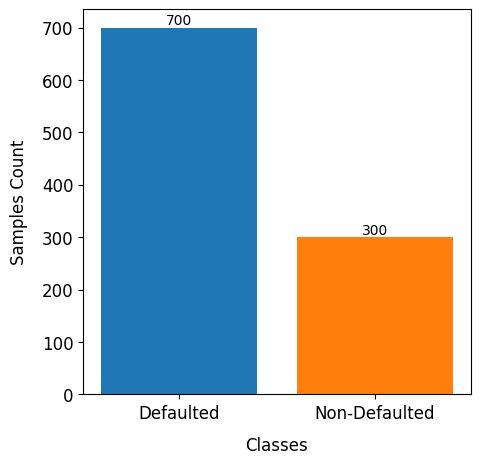

In [13]:
plotting.plot_class_distr_hist(data, save_path=ger_prep_ds_path)

#### Plot missing values histogram.

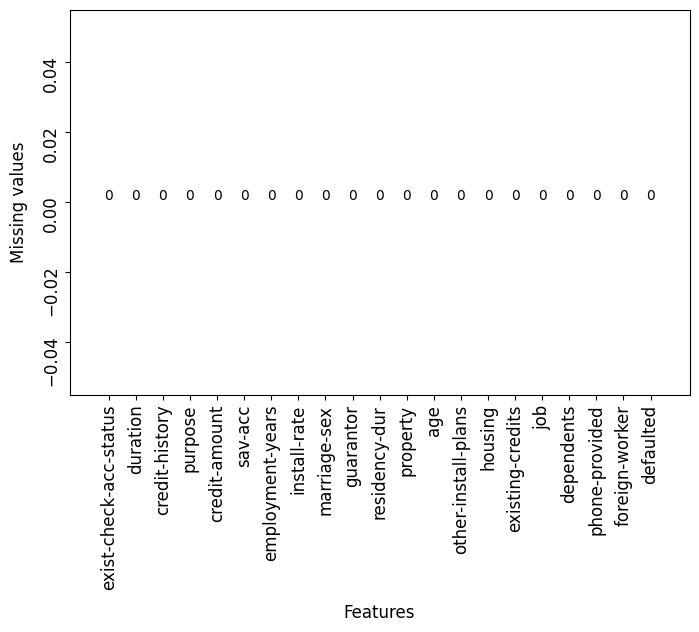

In [14]:
plotting.plot_missing_hist(data, save_path=ger_prep_ds_path)

#### Apply optimal binnin and WoE.

In [15]:
data, features_scores = preprocessing.optbinning_woe(data=data, solver="cp",
                                                     outlier_detector="range",
                                                     save_path=ger_prep_ds_path,
                                                     verbose=True)



Processing feature: exist-check-acc-status.
2023-05-30 17:02:50,934 | INFO : Optimal binning started.
2023-05-30 17:02:50,934 | INFO : Options: check parameters.
2023-05-30 17:02:50,935 | INFO : Pre-processing started.
2023-05-30 17:02:50,935 | INFO : Pre-processing: number of samples: 1000
2023-05-30 17:02:50,937 | INFO : Pre-processing: number of clean samples: 1000
2023-05-30 17:02:50,937 | INFO : Pre-processing: number of missing samples: 0
2023-05-30 17:02:50,937 | INFO : Pre-processing: number of special samples: 0
2023-05-30 17:02:50,937 | INFO : Pre-processing: number of outlier samples: 0
2023-05-30 17:02:50,938 | INFO : Pre-processing: number of others samples: 0
2023-05-30 17:02:50,938 | INFO : Pre-processing: number of categories: 4
2023-05-30 17:02:50,938 | INFO : Pre-processing: number of categories others: 0
2023-05-30 17:02:50,938 | INFO : Pre-processing terminated. Time: 0.0015s
2023-05-30 17:02:50,939 | INFO : Pre-binning started.
2023-05-30 17:02:50,940 | INFO : Pr

In [16]:
data

,exist-check-acc-status,duration,credit-history,purpose,credit-amount,sav-acc,employment-years,install-rate,marriage-sex,guarantor,residency-dur,property,age,other-install-plans,housing,existing-credits,job,dependents,phone-provided,foreign-worker,defaulted
0,-0.818099,1.181636,0.733741,0.410063,-0.129812,0.704246,0.235566,-0.157300,0.165548,-0.027974,-0.016367,0.461035,-0.066386,0.121179,0.194156,0.138930,0.022780,0.0,0.098638,0.0,False
1,-0.401392,-0.623823,-0.088319,0.410063,-0.440023,-0.271358,-0.032103,0.155466,-0.235341,-0.027974,-0.016367,0.461035,-0.524461,0.121179,0.194156,-0.075836,0.022780,0.0,-0.064691,0.0,True
2,1.176263,0.168017,0.733741,-0.587787,0.194992,-0.271358,0.394415,0.155466,0.165548,-0.027974,-0.016367,0.461035,0.279650,0.121179,0.194156,-0.075836,0.097164,0.0,-0.064691,0.0,False
3,-0.818099,-0.623823,-0.088319,-0.099235,-0.505406,-0.271358,0.394415,0.155466,0.165548,0.587787,-0.016367,-0.028573,0.279650,0.121179,-0.472604,-0.075836,0.022780,0.0,-0.064691,0.0,False
4,-0.818099,-0.195526,-0.085158,-0.353105,-0.440023,-0.271358,-0.032103,0.064539,0.165548,-0.027974,-0.016367,-0.586082,-0.066386,0.121179,-0.472604,0.138930,0.022780,0.0,-0.064691,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.176263,0.168017,-0.088319,-0.099235,0.194992,-0.271358,0.394415,0.064539,-0.235341,-0.027974,-0.016367,0.461035,-0.046227,0.121179,0.194156,-0.075836,0.097164,0.0,-0.064691,0.0,False
996,-0.818099,-0.278767,-0.088319,0.805625,1.459626,-0.271358,-0.032103,-0.157300,-0.441833,-0.027974,-0.016367,-0.028573,0.279650,0.121179,0.194156,-0.075836,-0.189242,0.0,0.098638,0.0,False
997,1.176263,0.168017,-0.088319,0.410063,-0.216952,-0.271358,0.235566,-0.157300,0.165548,-0.027974,-0.016367,-0.034191,0.385750,0.121179,0.194156,-0.075836,0.022780,0.0,-0.064691,0.0,False
998,-0.818099,-0.623823,-0.088319,0.410063,0.194992,-0.271358,-0.032103,-0.157300,0.165548,-0.027974,-0.016367,-0.586082,-0.524461,0.121179,-0.472604,-0.075836,0.022780,0.0,0.098638,0.0,True


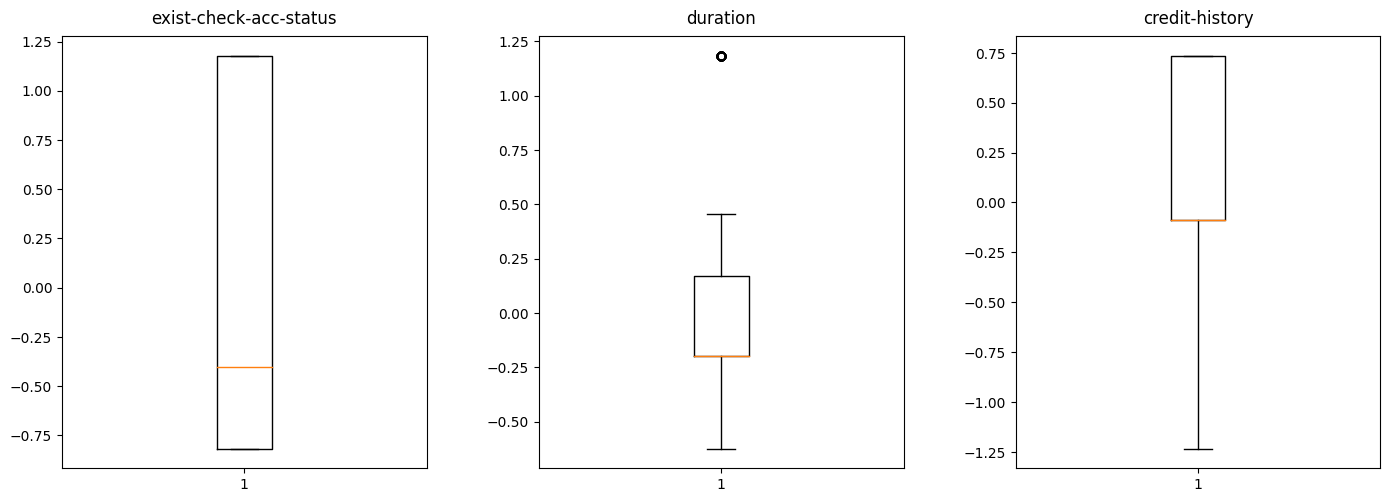

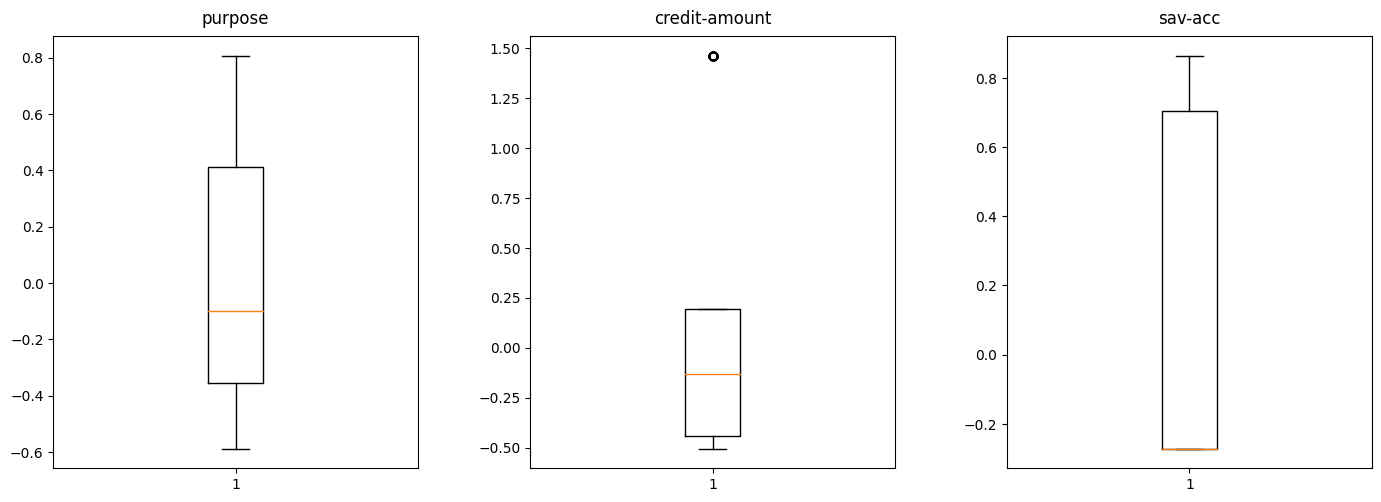

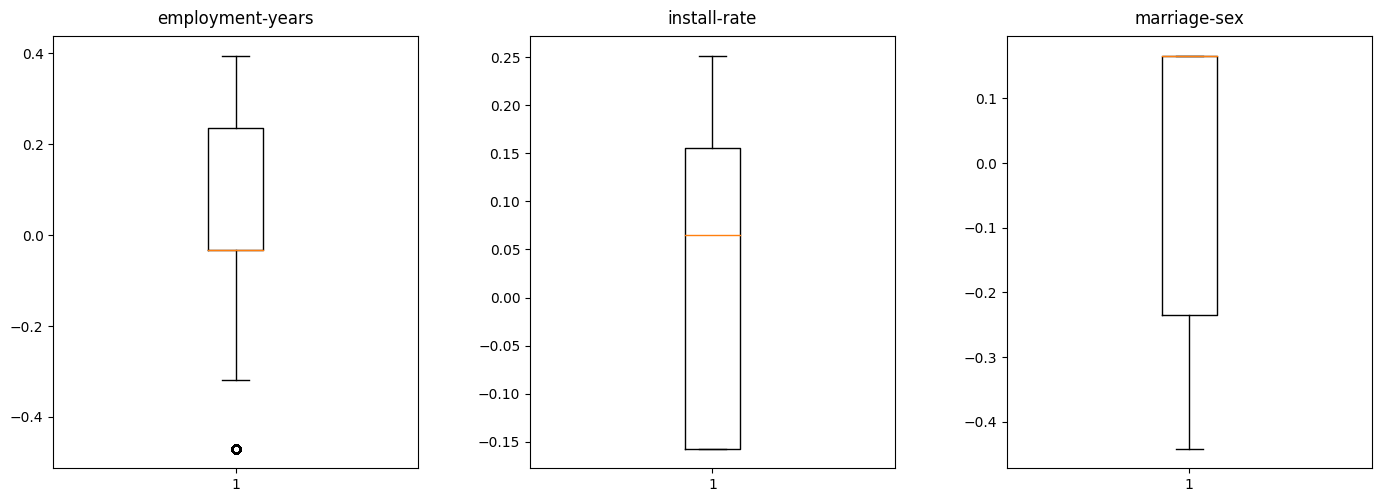

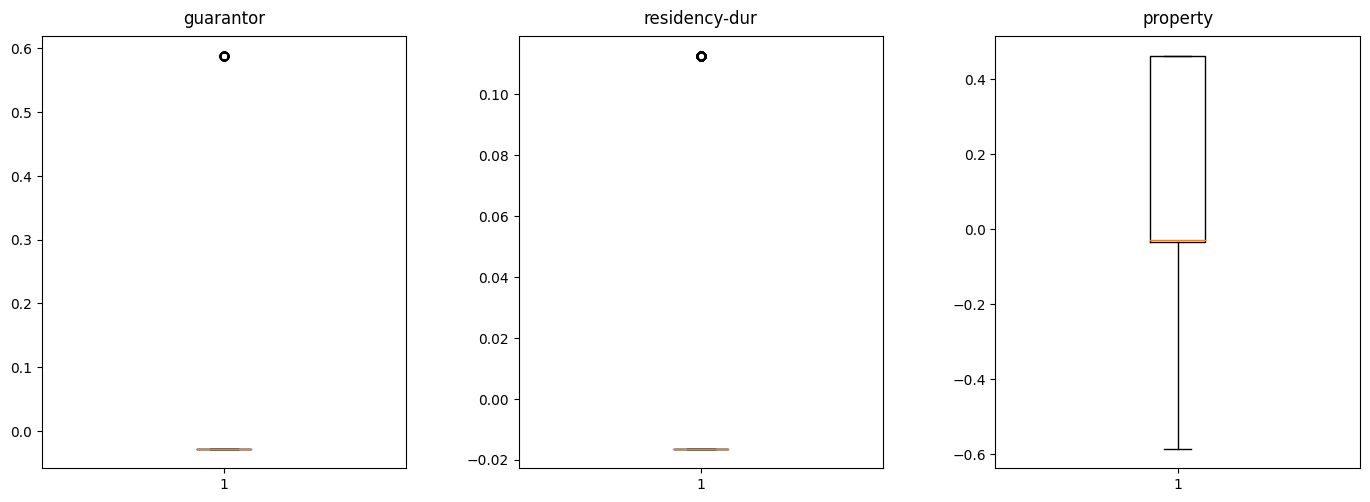

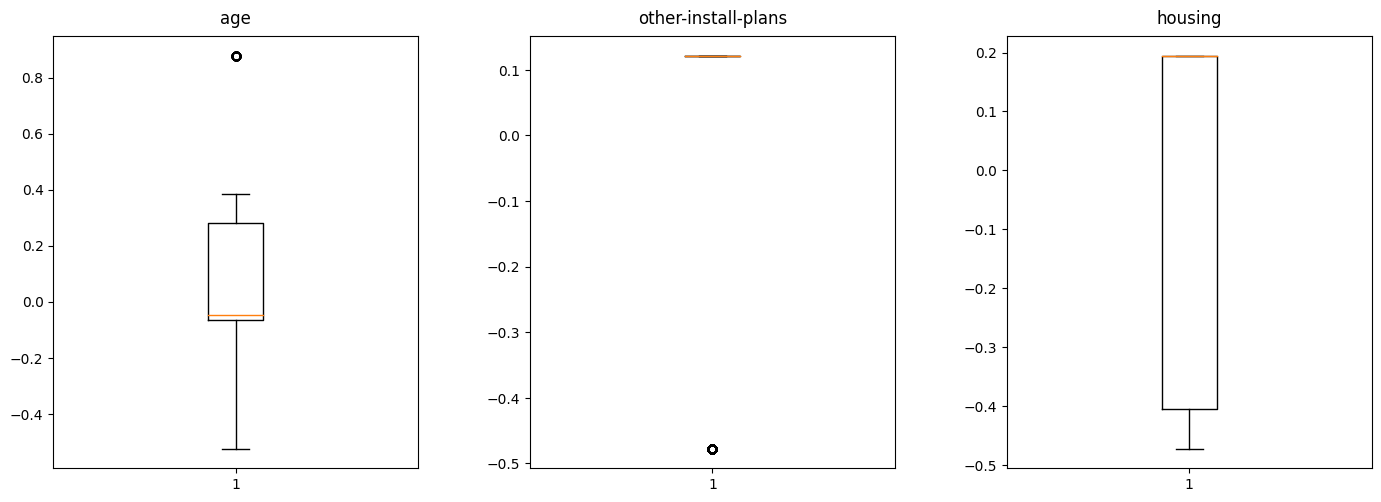

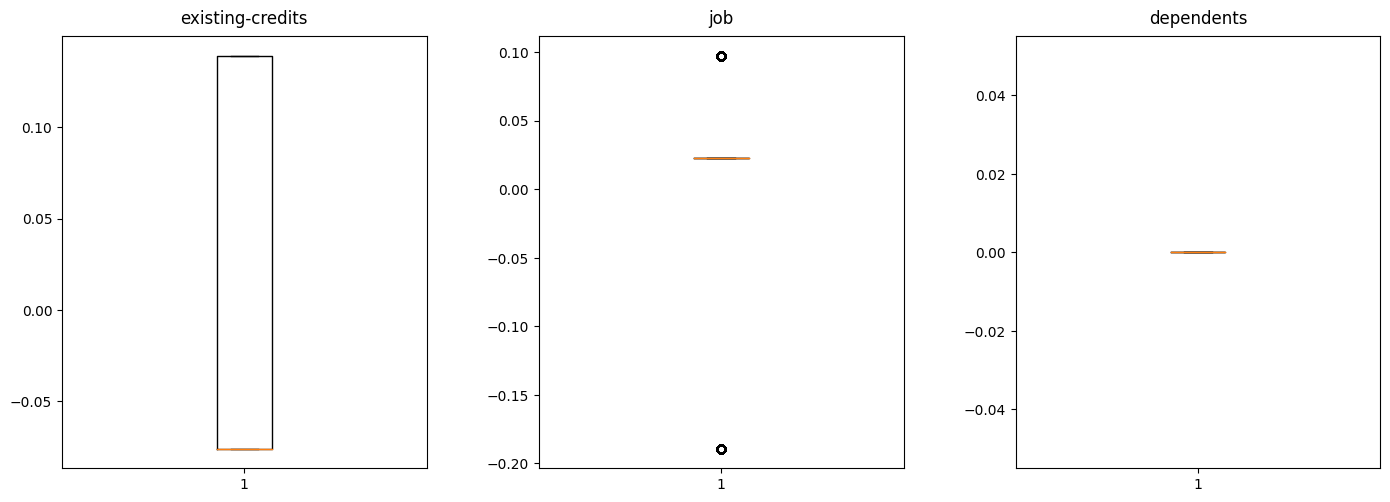

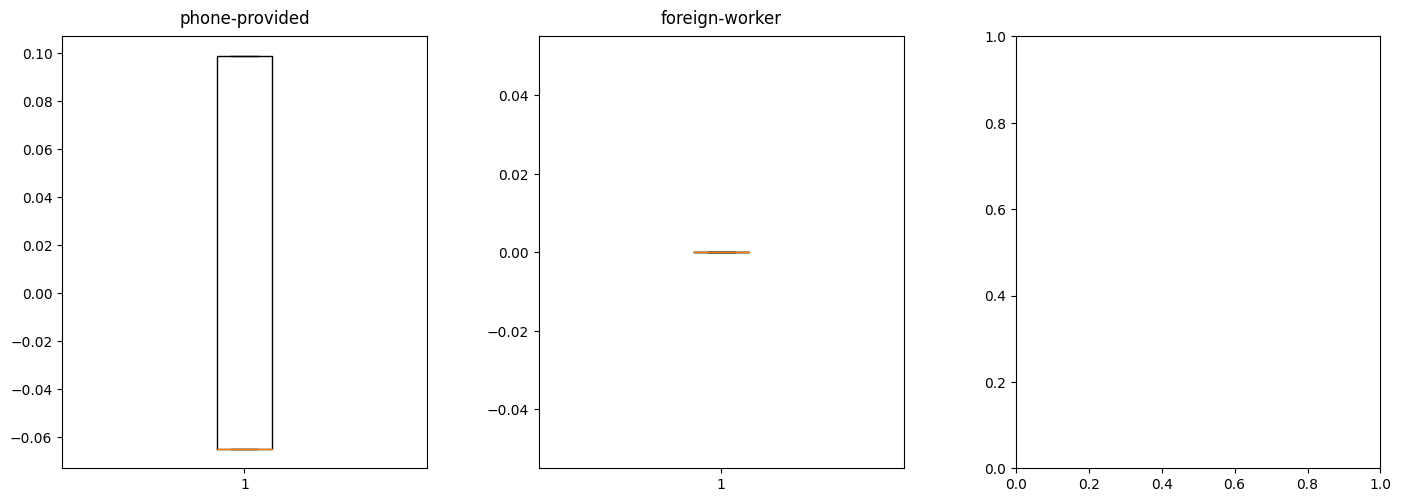

In [17]:
plotting.plot_numerical_boxplots(data, size=(15, 6), save_path=ger_prep_ds_path)

In [18]:
#plotting.plot_numerical_hist_kde(data, size=(15,5), save_path=ger_prep_ds_path)

#### Plot samples count before and after Data cleaning.

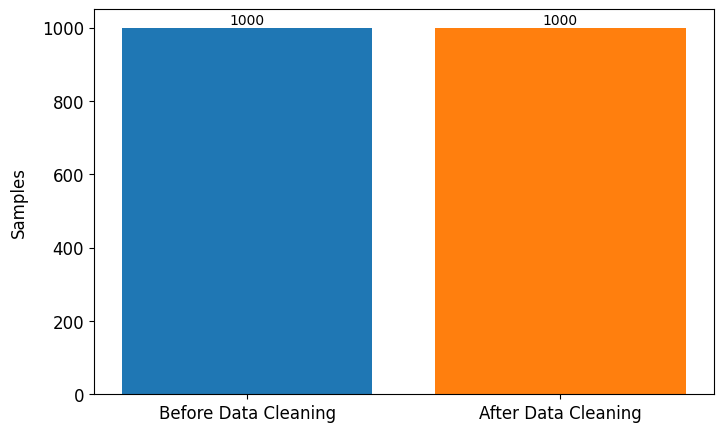

In [19]:
after_data_cleaning_count = len(data)
labels = ['Before Data Cleaning', 'After Data Cleaning']
values = [before_data_cleaning_count, after_data_cleaning_count]
plotting.plot_hist(labels, values, '', '', 'Samples', figsize=(8,5), rotated_ticks=False,
                   save_path=ger_prep_ds_path + 'before-after.pdf')

#### Features IV scores

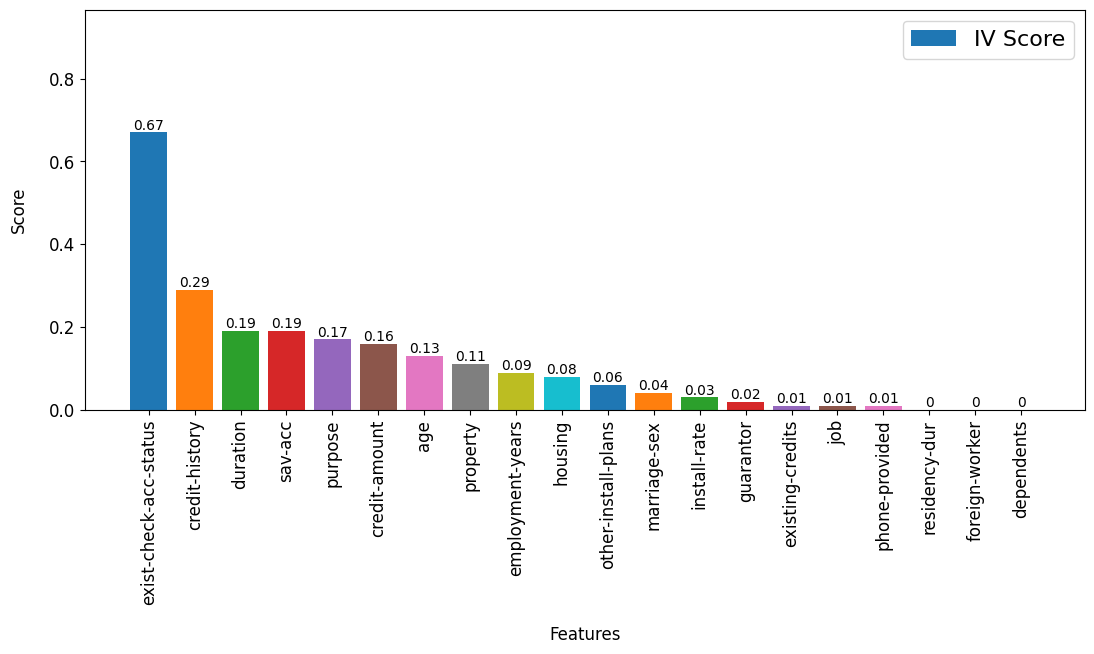

In [20]:
plotting.plot_features_scores(features_scores, '')

#### Drop features with lowest IV scores.

In [21]:
to_be_dropped = ['dependents', 'foreign-worker']
data.drop(to_be_dropped, axis=1, inplace=True)
for key in to_be_dropped:
    del features_scores[key]

#### Features correlation

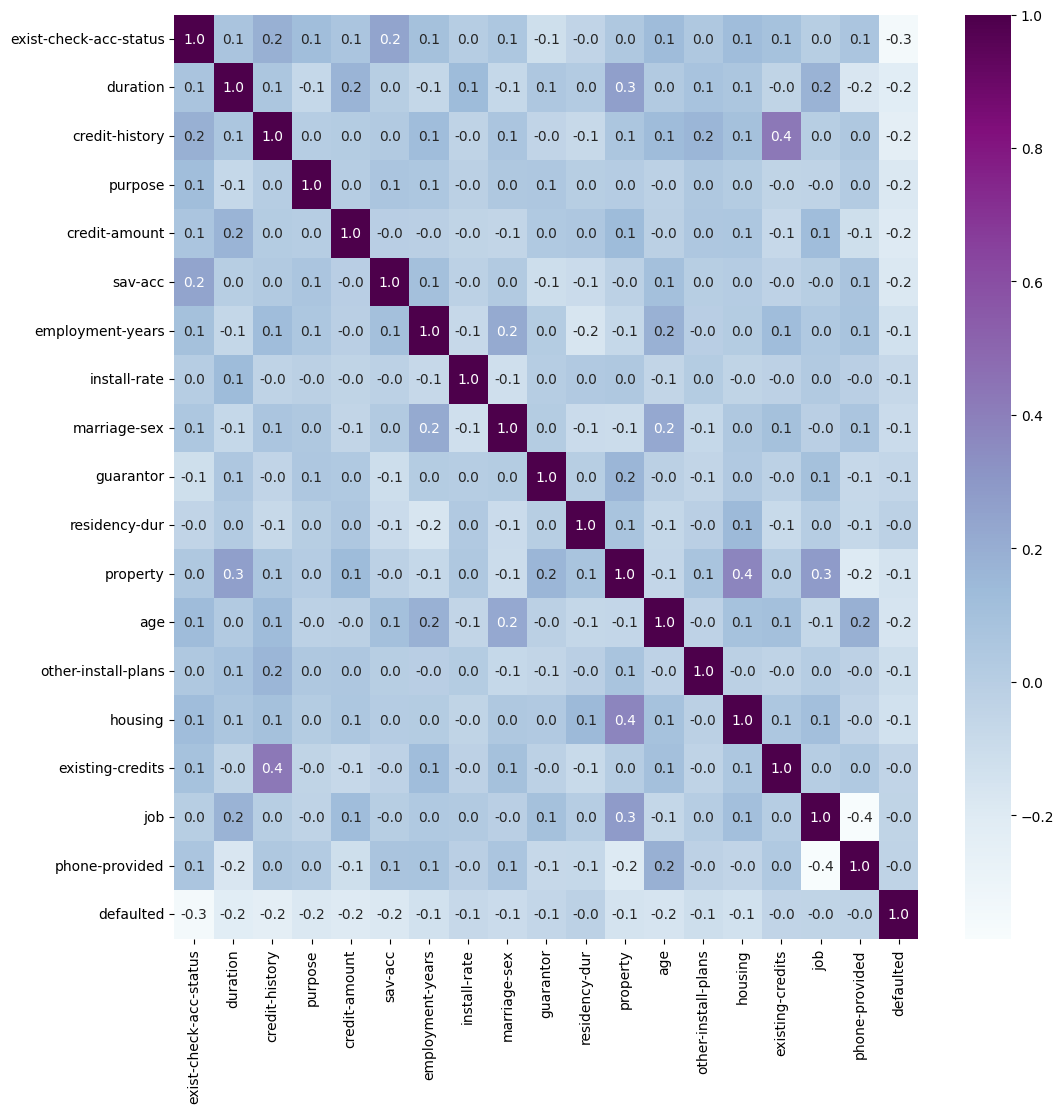

In [22]:
f_corr = preprocessing.features_correlation(data=data)
plotting.plot_heatmap(f_corr, figsize=(12, 12), save_path=ger_prep_ds_path, dpi=100)

#### Save preprocessed dataset.

In [23]:
data

,exist-check-acc-status,duration,credit-history,purpose,credit-amount,sav-acc,employment-years,install-rate,marriage-sex,guarantor,residency-dur,property,age,other-install-plans,housing,existing-credits,job,phone-provided,defaulted
0,-0.818099,1.181636,0.733741,0.410063,-0.129812,0.704246,0.235566,-0.157300,0.165548,-0.027974,-0.016367,0.461035,-0.066386,0.121179,0.194156,0.138930,0.022780,0.098638,False
1,-0.401392,-0.623823,-0.088319,0.410063,-0.440023,-0.271358,-0.032103,0.155466,-0.235341,-0.027974,-0.016367,0.461035,-0.524461,0.121179,0.194156,-0.075836,0.022780,-0.064691,True
2,1.176263,0.168017,0.733741,-0.587787,0.194992,-0.271358,0.394415,0.155466,0.165548,-0.027974,-0.016367,0.461035,0.279650,0.121179,0.194156,-0.075836,0.097164,-0.064691,False
3,-0.818099,-0.623823,-0.088319,-0.099235,-0.505406,-0.271358,0.394415,0.155466,0.165548,0.587787,-0.016367,-0.028573,0.279650,0.121179,-0.472604,-0.075836,0.022780,-0.064691,False
4,-0.818099,-0.195526,-0.085158,-0.353105,-0.440023,-0.271358,-0.032103,0.064539,0.165548,-0.027974,-0.016367,-0.586082,-0.066386,0.121179,-0.472604,0.138930,0.022780,-0.064691,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.176263,0.168017,-0.088319,-0.099235,0.194992,-0.271358,0.394415,0.064539,-0.235341,-0.027974,-0.016367,0.461035,-0.046227,0.121179,0.194156,-0.075836,0.097164,-0.064691,False
996,-0.818099,-0.278767,-0.088319,0.805625,1.459626,-0.271358,-0.032103,-0.157300,-0.441833,-0.027974,-0.016367,-0.028573,0.279650,0.121179,0.194156,-0.075836,-0.189242,0.098638,False
997,1.176263,0.168017,-0.088319,0.410063,-0.216952,-0.271358,0.235566,-0.157300,0.165548,-0.027974,-0.016367,-0.034191,0.385750,0.121179,0.194156,-0.075836,0.022780,-0.064691,False
998,-0.818099,-0.623823,-0.088319,0.410063,0.194992,-0.271358,-0.032103,-0.157300,0.165548,-0.027974,-0.016367,-0.586082,-0.524461,0.121179,-0.472604,-0.075836,0.022780,0.098638,True


In [24]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   exist-check-acc-status  1000 non-null   float64
 1   duration                1000 non-null   float64
 2   credit-history          1000 non-null   float64
 3   purpose                 1000 non-null   float64
 4   credit-amount           1000 non-null   float64
 5   sav-acc                 1000 non-null   float64
 6   employment-years        1000 non-null   float64
 7   install-rate            1000 non-null   float64
 8   marriage-sex            1000 non-null   float64
 9   guarantor               1000 non-null   float64
 10  residency-dur           1000 non-null   float64
 11  property                1000 non-null   float64
 12  age                     1000 non-null   float64
 13  other-install-plans     1000 non-null   float64
 14  housing                 1000 non-null   f

**EMP-$p_1$:**

In [25]:
preprocessing.compute_p1(data)

0.3

**EMP-$p_0$:**

In [26]:
preprocessing.compute_p0(data)

0.7

In [27]:
preprocessing.save_dataset(data=data,
                           features_scores=features_scores,
                           test_size=0.2,
                           save_path=ger_prep_ds_path)

Train split size: 800
Train split p1: 0.3
Train split p0: 0.7

Test split size: 200
Test split p1: 0.3
Test split p0: 0.7
